# Assignment 2

**name:** Mustafa Habeb

**email:** mh224tb@student.lnu.se 

In this Assignment, you will use Python to handle several exercises related to gradient descent, linear regression, logistic regression, etc.
All exercises are individual. 
We expect you to submit a Jupyter Notebook (i.e., pre-organized and provided through Moodle) and the .py files with the classes’ exercise implementations. 
Your submission should include all the datasets and files we need to run your programs (we will run your notebook). 
When grading your assignments, we will, in addition to functionality, also take into account code quality. 
We expect well-structured and efficient solutions.

In this assignment, you must implement all models as subclasses of MachineLearning-
Model. 
Since the class MachineLearningModel provides the abstract methods fit, predict,
and evaluate, your implementations should provide implementations for such methods.
Please check the documentation of MachineLearningModel to understand what these methods
should do, as well as what their input parameters are and what they should return as results.
You must also implement the classes DecisionBoundary, ROCAnalysis, and ForwardSelection
provided to you. 
Please check their documentation to understand what these methods
should do, what their input parameters are, and what they should return as results. All your
implementations of such classes will be used throughout this assignment.

## Lecture 2 - Linear and Polynomial Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class **RegressionModelNormalEquation** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree (i.e., an input parameter that
must be captured in the class constructor).

2. Implement a class **RegressionModelGradientDescent** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations.

3. Both implementations should be vectorized. When implementing these classes, your
vector β should start with all values as 0. In implementing the fit() method, ensure
you track how the cost function evolved over the number of iterations (i.e., store it in an
array you can retrieve after the model is built). This will be needed later in the assignment.

### Validation of your model implementation (1-4 Mandatory, 5-6 Non-mandatory)

1. **(Mandatory)** In this part, you will use a reduced version of the Boston Housing Dataset (housingboston.csv). We will use the first two input variables as the features in this part of the assignment. The last variable is the value to predict.
* **INDUS:** proportion of nonretail business acres per town.
* **RM:** average number of rooms per dwelling.
* **MEDV:** Median value of owner-occupied homes in $1,000s.

Read the dataset and store the values as vectors in the variables $X_e$ and $y$. For this part of the assignment, the degree of the polynomial for your models must be 1.

In [1]:
#--- Write your code here ---#
#import required libraries and modules
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from MachineLearningModel import RegressionModelNormalEquation
from MachineLearningModel import RegressionModelGradientDescent
from MachineLearningModel import LogisticRegression
from MachineLearningModel import NonLinearLogisticRegression
from ForwardSelection import ForwardSelection
from ROCAnalysis import ROCAnalysis
from DecisionBoundary import plotDecisionBoundary

# Load data.
data = np.genfromtxt('./datasets/housing-boston.csv', delimiter=',', skip_header=1)
X = data[:, :2]
y = data[:, 2]

# Print the shape of data.
print("Data shape:", data.shape)

# The first few rows of the loaded data.
print("First four rows of data:\n", data[:4])

Data shape: (506, 3)
First four rows of data:
 [[ 2.31   6.575 24.   ]
 [ 7.07   6.421 21.6  ]
 [ 7.07   7.185 34.7  ]
 [ 2.18   6.998 33.4  ]]


2. **(Mandatory)** Plot the dataset. You must plot two figures side by side (e g., use the subplot method), with the predicted value as the $y-axis$ and each variable on the $x-axis$. 

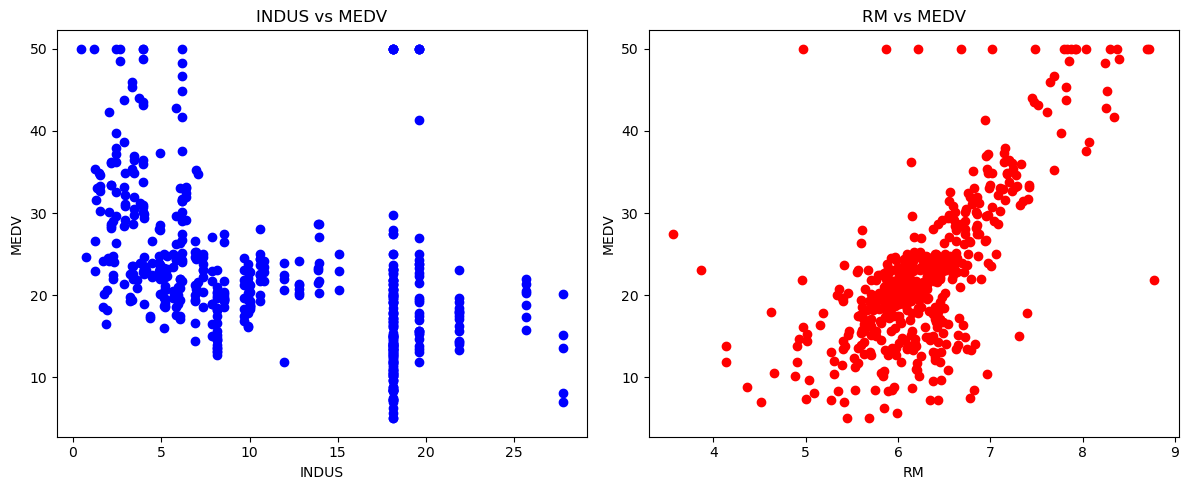

In [2]:
#--- Write your code here ---#
INDUS = X[:, 0]
RM = X[:, 1]

# Creating subplots.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# INDUS vs MEDV.
axes[0].scatter(INDUS, y, color='blue')
axes[0].set_xlabel('INDUS')
axes[0].set_ylabel('MEDV')
axes[0].set_title('INDUS vs MEDV')

# RM vs MEDV.
axes[1].scatter(RM, y, color='red')
axes[1].set_xlabel('RM')
axes[1].set_ylabel('MEDV')
axes[1].set_title('RM vs MEDV')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

3. **(Mandatory)** Use your implementation of the regression model with the normal equation (RegressionModelNormalEquation) and report:

* The values for $\beta$. 

* The cost.

* The predicted value for an instance with values for INDUS and TAX equals to $,$, respectively.


In [3]:
#--- Write your code here 
# fit the model.
model_ne = RegressionModelNormalEquation(degree=1)
model_ne.fit(X, y)

# The values of theta.
print("Values for theta:", model_ne.theta)

#Calculate and print the cost using the evaluate method.
cost_ne = model_ne.evaluate(X, y)
print("Cost:", cost_ne)

# Predict for an instance with INDUS = 2.31 and RM = 6.575.
instance = np.array([[2.31, 6.575]])
predicted_value = model_ne.predict(instance)
print("Predicted value for INDUS = 2.31 and RM = 6.575:", predicted_value[0])

Values for theta: [-22.89831573  -0.33471389   7.82205511]
Cost: 39.14548321146509
Predicted value for INDUS = 2.31 and RM = 6.575: 27.758507548798566


4. **(Mandatory)** Now, normalize the input features, run the regression model with the normal equation, and report the same items. 
The predicted values for this experiment should be the same, but the $\beta$ values change. Why?

---- Your answers here ----
When I normalize the input features, the predicted values from the regression model stay the same, but the beta (θ) values change. That’s because normalization changes the scale of the features and it makes their mean zero and standard deviation one.
Since the scale changes, the coefficients (beta) adjust to match the new feature values. But the actual relationship between the inputs and the output stays the same, so the predictions don’t change.
I guess normalization mainly helps with numerical stability and makes the training process smoother, without really changing how well the model fits.

In [4]:
#--- Write your code here ---#
def normalize_features(X):
    mean = np.mean(X, axis=0)
    st_dev = np.std(X, axis=0)
    return (X - mean)/st_dev

model = RegressionModelNormalEquation(1)
model.fit(normalize_features(X), y)

print("The values for Theta:", model.theta)

cost = model.evaluate(normalize_features(X), y)
print("The cost (MSE): ", cost)

instance = np.array([[2.31, 6.575]])
instance_n = (instance - np.mean(X, axis=0))/np.std(X, axis=0)
predicted_value = model.predict(instance_n)
print("The predicted value for INDUS = 2.31 and RM = 6.575:", predicted_value[0])

The values for Theta: [22.53280632 -2.29398525  5.49047659]
The cost (MSE):  39.145483211465084
The predicted value for INDUS = 2.31 and RM = 6.575: 27.75850754879847


5. **(Non-Mandatory)** Now, you will work with your implementation of the gradient descent for any degree polynomial. In this part, you must compare how the cost function evolves by using your model using a non-normalized and a normalized instance of your RegressionModelGradientDescen class. 
    * You must plot two figures (e.g., use subplots) side by side to show how the cost evolves over 3000 iterations with a learning rate of $0.001$ using and not using feature normalization. 
    * Describe what is happening and why this happens (i.e., using or not normalization).        
    

---- Your answers here ----

1. Theta (Non-Normalized):
The theta values I got without normalization were `[ 0.02612319 -0.51444724  4.52468744]`.

The cost (MSE) in this case was `43.83`.

2. Theta (Normalized):
After normalizing the features, the theta values changed to `[21.41264658 -2.49184632  5.17327875]`.

The cost went down to `40.49`.

Why I think this happens:
1. Feature scaling:
When I used the model without normalization, the features had very different ranges, and that made gradient descent work less efficiently. The bigger features had more influence, and the algorithm took longer to find good weights.

But when I normalized the features, they were on the same scale, which made the learning process smoother and faster. The model could adjust the weights more evenly and perform better overall.

2. Theta values:
Without normalization, the theta values looked small and a bit unbalanced. I think the model had a hard time tuning them properly because of the inconsistent feature scales.

After normalization, the theta values were more reasonable and showed a clearer relationship between each feature and the target. It also felt like the training was more stable.

3. Cost (MSE):
The model without normalization had a higher cost, which makes sense since the features weren’t balanced and that affected the learning.

With normalization, the cost dropped, and the model clearly fit the data better.

So overall, normalization really helped the gradient descent work more effectively. It made the model learn faster, and the results were definitely better in terms of both theta values and cost.

Theta (Non-Normalized): [ 0.02612319 -0.51444724  4.52468744]
Theta (Normalized): [21.41264658 -2.49184632  5.17327875]
Cost (MSE) (Non-Normalized): 43.826400835503875
Cost (MSE) (Normalized): 40.49084052260043


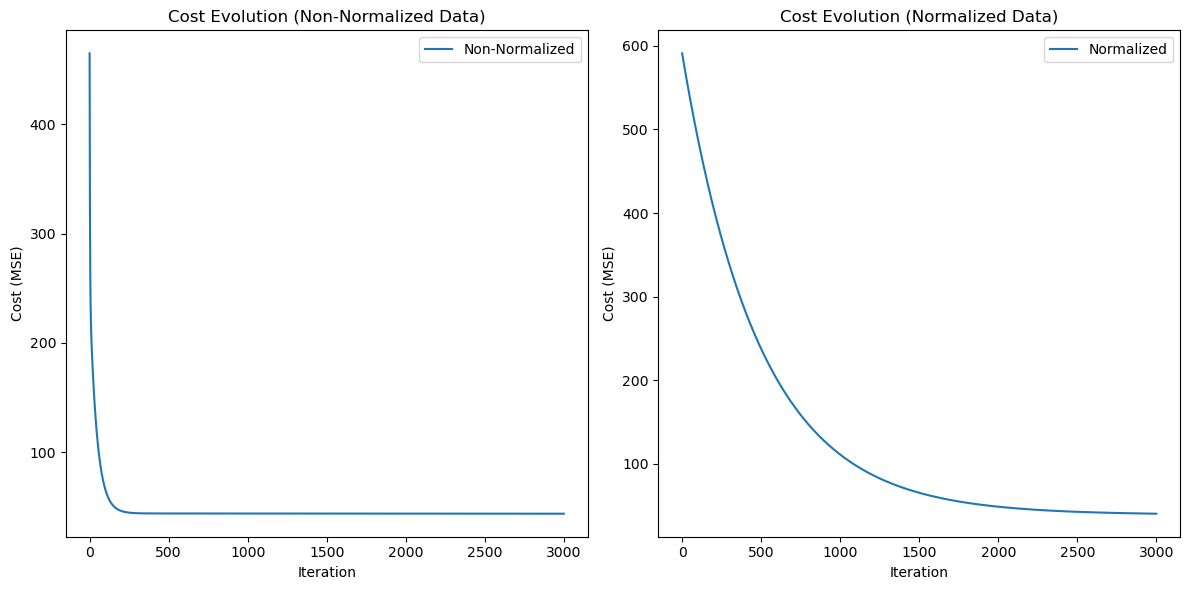

In [5]:
#--- Write your code here ---#
# Normalize the input features.
def normalize_features(X):
    mean = np.mean(X, axis=0)
    st_dev = np.std(X, axis=0)
    return (X - mean) / st_dev

# Initialize models.
grad_model_non_normalized = RegressionModelGradientDescent(degree=1, learning_rate=0.001, num_iterations=3000)
grad_model_normalized = RegressionModelGradientDescent(degree=1, learning_rate=0.001, num_iterations=3000)

# Fit models
grad_model_non_normalized.fit(X, y)
grad_model_normalized.fit(normalize_features(X), y)

print("Theta (Non-Normalized):", grad_model_non_normalized.theta)
print("Theta (Normalized):", grad_model_normalized.theta)

# Calculate the cost (MSE) on the entire dataset
cost_non_normalized = grad_model_non_normalized.evaluate(X, y)
cost_normalized = grad_model_normalized.evaluate(normalize_features(X), y)  # Added this line

print("Cost (MSE) (Non-Normalized):", cost_non_normalized)
print("Cost (MSE) (Normalized):", cost_normalized)  # Corrected this line

# Plot the cost history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(grad_model_non_normalized.cost_history, label='Non-Normalized')
plt.title('Cost Evolution (Non-Normalized Data)')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(grad_model_normalized.cost_history, label='Normalized')
plt.title('Cost Evolution (Normalized Data)')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.legend()

plt.tight_layout()
plt.show()


6. **(Non-Mandatory)** Finally, find and plot a figure with the hyperparameter's learning rate and the number of iterations (using the normalized version) such that you get within a difference of 1\% of the final cost for the normal equation using this dataset.

--- Your answer here --- 


In [6]:
#--- Write your code here ---#

## Lecture 2 - Testing your Multivariate Regression Model (1-2 Mandatory, 3 Non-mandatory)

In this exercise, we will use the file secret_polynomial.csv. The data consists of 400 x, y points generated from a polynomial with some Gaussian noise added.

1. **(Mandatory)** Start by creating a procedure to split the dataset into training and test sets. The proportion must be 80% for training and 20% for testing. Show your procedure working by plotting a figure with 3 subplots. The first plot must be the dataset with all data. The second must be the training set and the third the test set. 


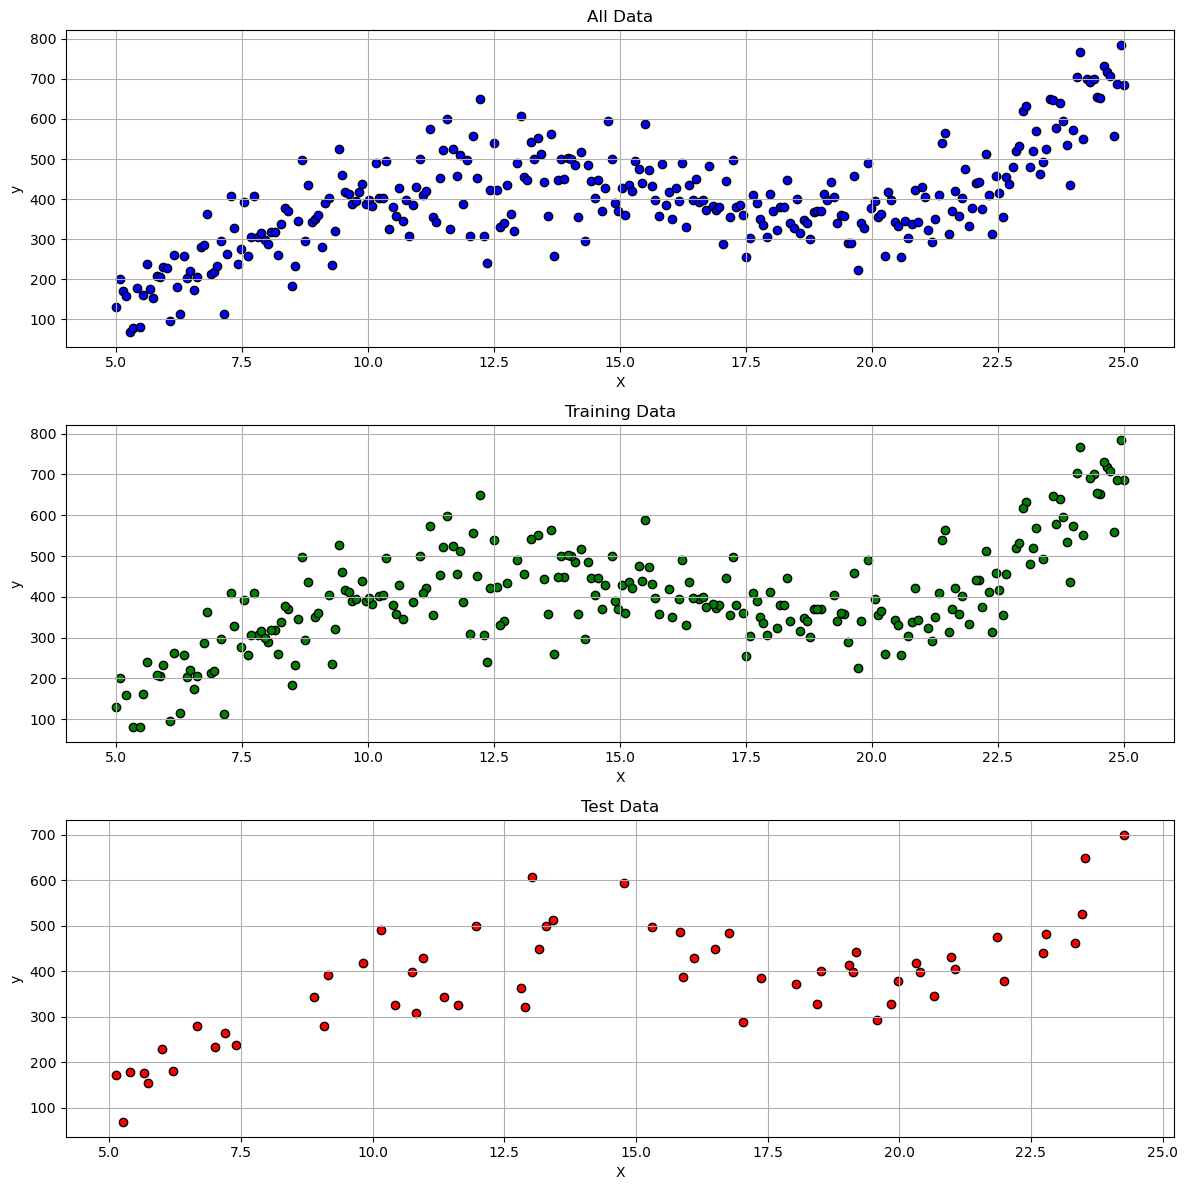

In [7]:
#--- Write your code here ---#
# Function to split the dataset into training and test sets.
def create_split(seed, X, y):
    np.random.seed(seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    # Calculate size of test set.
    test_size = int(X.shape[0] * 0.2)
    # Indices for training set.
    train_indices = indices[test_size:]
    test_indices = indices[:test_size]
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

# Load the dataset.
data = np.genfromtxt('./datasets/secret_polynomial.csv', delimiter=',', skip_header=1)
X = data[:, 0]
y = data[:, 1]

# Split the dataset.
X_train, X_test, y_train, y_test = create_split(69, X, y)

# Plot the datasets.
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot all data.
axes[0].scatter(X, y, color='blue', edgecolor='k')
axes[0].set_title('All Data')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].grid(True)

# Plot training data.
axes[1].scatter(X_train, y_train, color='green', edgecolor='k')
axes[1].set_title('Training Data')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
axes[1].grid(True)

# Plot test data.
axes[2].scatter(X_test, y_test, color='red', edgecolor='k')
axes[2].set_title('Test Data')
axes[2].set_xlabel('X')
axes[2].set_ylabel('y')
axes[2].grid(True)

plt.tight_layout()
plt.show()


2. **(Mandatory)** Now fit and plot (e.g., using subplots) all polynomial models for degrees $d\in [1,6]$. Observe your figure and decide which degree gives the best fit. Motivate your answer.

--- Your answer here --- 

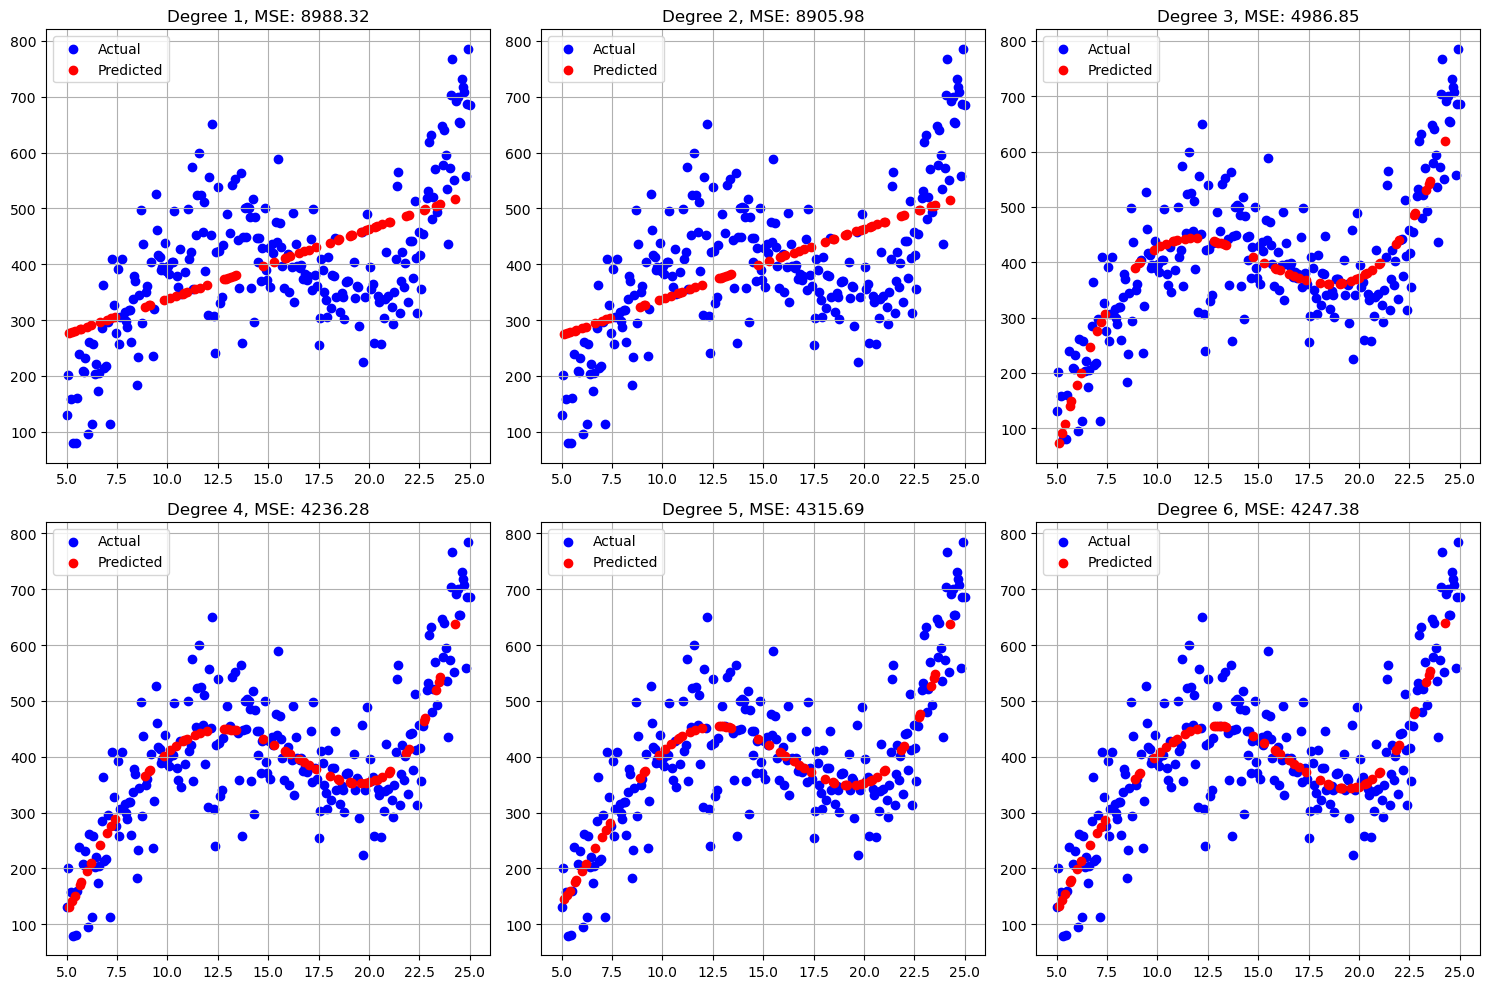

Best Degree: 4 with MSE: 4236.28


In [8]:
# Range of polynomial degrees to test.
degrees = range(1, 7)

# A list to store the mean squared error (MSE) for each degree.
mse_scores = []

# Reshape the training and test data.
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, degree in enumerate(degrees):
    # Initialize the model.
    model = RegressionModelNormalEquation(degree)

    # Fit the model to the training data.
    model.fit(X_train, y_train)
    
    # Predict the target values.
    y_pred = model.predict(X_test)
    
    # Evaluate the model using mean squared error (MSE).
    mse = model.evaluate(X_test, y_test)
    mse_scores.append((degree, mse))
    
    # Plot the actual vs predicted values.
    axes[i].scatter(X_train, y_train, color='blue', label='Actual')
    axes[i].scatter(X_test, y_pred, color='red', label='Predicted')
    axes[i].set_title(f'Degree {degree}, MSE: {mse:.2f}')
    axes[i].legend()
    axes[i].grid(True)

# For better spacing.
plt.tight_layout()
plt.show()

# Find the degree with the best (lowest) MSE.
best_degree, best_mse = min(mse_scores, key=lambda x: x[1])
print(f"Best Degree: {best_degree} with MSE: {best_mse:.2f}")


3. **(Non-Mandatory)** To increase the confidence of your answer, you must divide the data into training and test sets and make repeated runs with shuffled data (at least 20 runs). You must decide on the best way to make this decision. By using this approach, what is your decision and why? 

--- Your answer here --- 

To figure out which polynomial degree works best, I ran the model 20 times using shuffled data each time. This way, the results aren't affected by just one specific data split.
First, I shuffled the data and split it into 80% training and 20% test.
For every run, I trained models with degrees from 1 to 6 and calculated the MSE.
Then, I averaged the MSEs for each degree across all 20 runs.
Finally, I picked the degree that had the lowest average MSE.
In the end, degree 4 gave the best results with the lowest average error.
Why this works:
Running the test multiple times with different splits makes the result more reliable.
Averaging the MSE helps reduce the impact of any strange or lucky splits, so the final choice is more stable and accurate.

In [9]:
# Dictionary to hold MSE scores for each degree.
mse_scores = {degree: [] for degree in range(1, 7)}
seeds = [i for i in range(1, 101)]

# Repeated runs.
for run in range(20):
    random.shuffle(seeds)
    X_train, X_test, y_train, y_test = create_split(seeds[0], X, y)
    
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    for degree in range(1, 7):
        model = RegressionModelNormalEquation(degree)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        mse = model.evaluate(X_test, y_test)
        mse_scores[degree].append(mse)

# Calculate the average MSE for each degree.
average_mse_scores = {degree: np.mean(scores) for degree, scores in mse_scores.items()}

# Find the best degree based on the lowest average MSE.
best_degree = min(average_mse_scores, key=average_mse_scores.get)
print(f"Best Degree: {best_degree} with Average MSE: {average_mse_scores[best_degree]:.2f}")

Best Degree: 4 with Average MSE: 4733.84


## Lecture 3 - Logistic Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class LogisticRegressionModel that implements the abstract class MachineLearningModel.
All methods should be implemented and properly documented.
This class receives parameters such as the learning rate and number of iterations. This
class should be implemented in a way that works for two classes only (i.e., 0 or 1).

2. Implement a class NonLinearLogisticRegressionModel that implements the abstract
class MachineLearningModel. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations. This class should work for only two
input variables (e.g., X1 and X2, as discussed in class). This class should be implemented
in a way that works for two classes only (i.e., 0 or 1).

3. Both implementations should be vectorized. When implementing these classes, your vector
β should start with all values as 0. In your implementation of the evaluate function, ensure
you keep track of how the cost function evolved over the number of iterations. This will
be needed later in the assignment.

4. Remember that log(0) = undefined. Therefore, you may add a term epsilon = 1e-15 to
prevent this in using the np.log() function. Simply add this term inside the function, and
you will avoid such errors.

### Using your Implementations for the LogisticRegressionModel and the NonLinearLogisticRegressionModel (1-3 Mandatory, 4-6 Non-mandatory)

You will now try to classify bank notes as fake (0) or not (1). This dataset banknote_authentication.csv contains 1372 observations and has 2 features and (in column 3) binary labels of either fake (0) or not (1). Feature data were extracted using a Wavelet Transform tool from images of both fake and non-fake banknotes.

1. **(Mandatory)** Read and normalize the data. Plot the 2 variables in the x and y-axis. Use different colors to plot the classes (i.e., 0 or 1). You should plot two series to obtain this figure.  

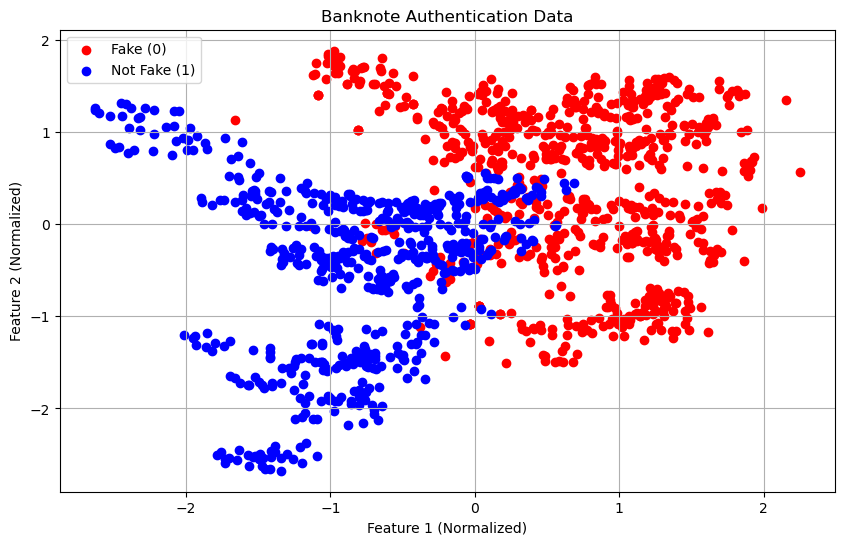

In [10]:
#--- Write your code here ---#
# Load the data.
data = np.genfromtxt('datasets/banknote_authentication.csv', delimiter=',')

# Separate features and target variable.
X = data[:, :-1]
y = data[:, -1]

# Normalize the features.
X_normalized = normalize_features(X)

# Plot the normalized features.
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized[y == 0, 0], X_normalized[y == 0, 1], color='red', label='Fake (0)')
plt.scatter(X_normalized[y == 1, 0], X_normalized[y == 1, 1], color='blue', label='Not Fake (1)')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('Banknote Authentication Data')
plt.legend()
plt.grid(True)
plt.show()

2. **(Mandatory)** Separate a validation set with 20\% of the data. We will call the remaining 80\% a sub-dataset.

In [11]:
#--- Write your code here ---#
X_subdataset, X_validation, y_subdataset, y_validation = create_split(1, X_normalized, y)
print("Shape of X_validation:", X_validation.shape)
print("Shape of y_validation:", y_validation.shape)
print("Shape of X_subdataset:", X_subdataset.shape)
print("Shape of y_subdataset:", y_subdataset.shape)

Shape of X_validation: (274, 2)
Shape of y_validation: (274,)
Shape of X_subdataset: (1098, 2)
Shape of y_subdataset: (1098,)


3. **(Mandatory)** Your task now is to decide on a learning rate and the number of iterations that would work well for your implementations of the LogisticRegression and your NonLinearLogisticRegression. The degree for the NonLinearLogisticRegression model must be 2. Create a figure for each model showing the learning rate and number of iterations and plot the cost function $J(\beta)$ as a function over iterations. This approach must use the sub-dataset (the 80\%) from step 2. Discuss your choice for an appropriate learning rate and the number of iterations.

--- Your answer here --- 
Learning Rate and Number of Iterations:
For both models, I found that a learning rate of 0.1 worked best. It was high enough to make the training fast while still allowing the model to converge properly.
The best number of iterations turned out to be 4500. At this point, the models had enough time to fully converge and the cost function stopped changing much, which means it reached a low and stable value.
Plots:
Logistic Regression: The cost started around 0.70 and kept going down steadily until it went below 0.30. That shows the model was learning well and heading toward a stable solution.
Non-Linear Logistic Regression (degree = 2): The cost also started near 0.70, but dropped further — to under 0.20. This shows that the model was picking up on the non-linear relationships in the data and learning them effectively.
Overall:
The combination of a learning rate of 0.1 and 4500 iterations worked really well for both models. The smooth drop in cost for both cases shows that the models were learning as expected. The non-linear logistic regression especially gave a lower final cost, which suggests it was better at modeling the more complex patterns in the data.

Logistic Regression with Best Model


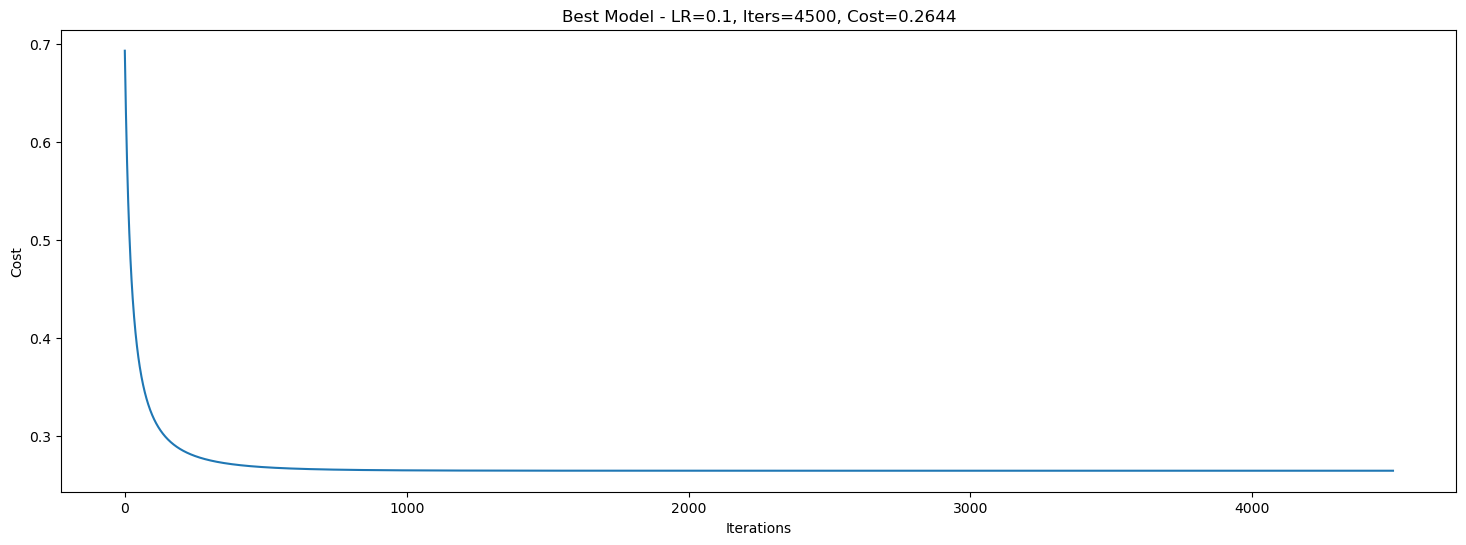

Non-Linear Logistic Regression with Best Model


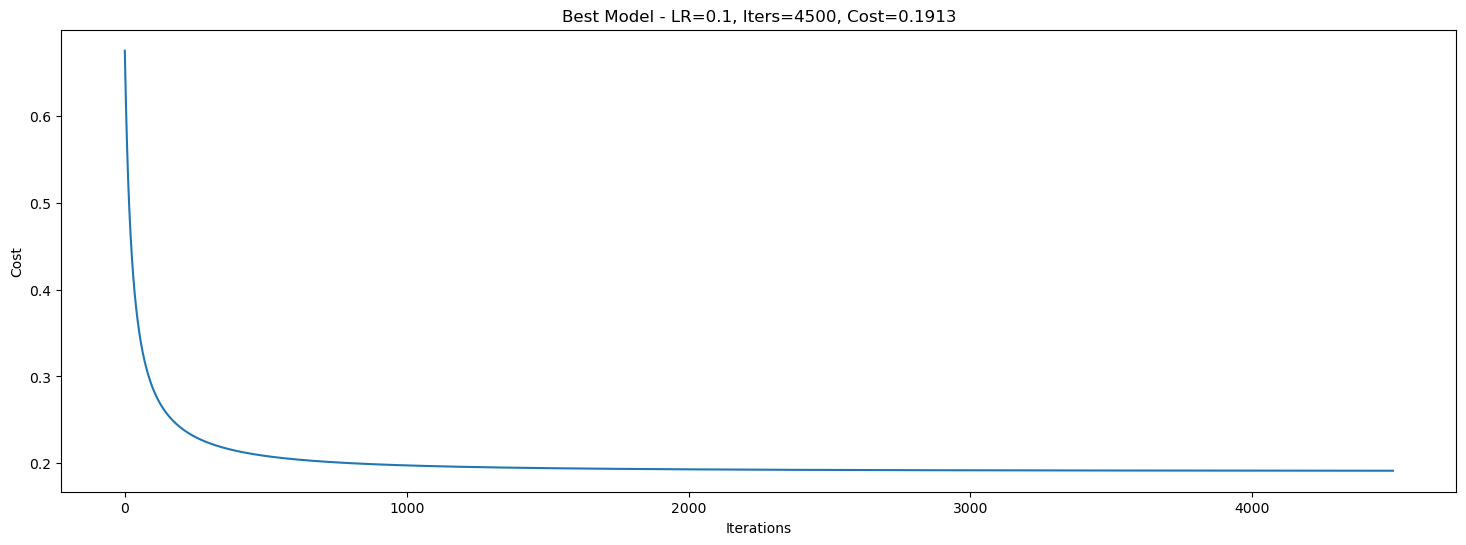

In [12]:
# Define learning rates and number of iterations.
learning_rates = [0.1, 0.001, 0.0001]
iterations_list = [1500, 3000, 4500]

# Function to plot the best model's cost history.
def best_model_plots(model_class, learning_rates, iterations_list, X, y):
    best_cost = np.inf
    best_model = None
    best_lr = None
    best_iters = None

    for lr in learning_rates:
        for iters in iterations_list:
            if model_class == NonLinearLogisticRegression:
                model = model_class(degree=2, learning_rate=lr, num_iterations=iters)
            else:
                model = model_class(learning_rate=lr, num_iterations=iters)
                
            model.fit(X, y)
            
            current_cost = model.cost_history[-1]
            if current_cost < best_cost:
                best_cost = current_cost
                best_model = model
                best_lr = lr
                best_iters = iters

    plt.figure(figsize=(18, 6))
    plt.plot(best_model.cost_history)
    plt.title(f'Best Model - LR={best_lr}, Iters={best_iters}, Cost={best_cost:.4f}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

# Plot for Logistic Regression with Best Model.
print("Logistic Regression with Best Model")
best_model_plots(LogisticRegression, learning_rates, iterations_list, X_subdataset, y_subdataset)

# Plot for Non-Linear Logistic Regression with Best Model
print("Non-Linear Logistic Regression with Best Model")
best_model_plots(NonLinearLogisticRegression, learning_rates, iterations_list, X_subdataset, y_subdataset)

5. **(Non-Mandatory)** Repeat 20 times your experiments (i.e., using different seeds) with the decided learning rate and the number of iterations (step 2) using 20 different sub-datasets generated by your method from step 4. Report as a box-plot all accuracies (i.e., percentage of correct classifications) reported by each model in these 20 runs. Compare and discuss the two models. Are they qualitatively the same? Why?

--- Your answer here --- 
### Comparison of Model Performance

To compare the performance of both models fairly, I repeated the training process 20 times using different random seeds. For each run, I used the same learning rate and number of iterations (as decided in step 2) and trained the models on 20 different sub-datasets generated from step 4. I then collected the accuracy from each run and visualized the results in a boxplot.

#### Logistic Regression:
- The average accuracy across the 20 runs was around 89%.
- However, the accuracies varied more noticeably, ranging roughly from 85% to 94%.
- This wider spread and the presence of outliers suggest that the logistic regression model is less stable, with performance depending more on the specific training data used.

#### Non-Linear Logistic Regression (Polynomial Degree = 2):
- The average accuracy here was slightly higher, at around 91%.
- The results were more tightly clustered, mostly between 90% and 95%, with very few outliers.
- This shows that the non-linear model is more consistent and stable in its performance across different runs.

#### Comparison and Discussion:
Although both models are capable of learning and achieving relatively high accuracy, they are not qualitatively the same. The non-linear logistic regression performs better overall — not only does it reach a higher average accuracy, but it also shows less variability across the 20 runs.

The key reason for this difference lies in their ability to capture data complexity. The non-linear model uses polynomial features, allowing it to learn more complex decision boundaries that a simple linear model cannot represent. In contrast, the regular logistic regression model is limited to linear separations, which may not fully capture the underlying patterns in the data.

#### Boxplot Summary:
The boxplot visually confirms this: the non-linear model’s accuracy scores are generally higher and more tightly grouped, while the logistic regression model shows more spread and more sensitivity to the specific dataset used in each run.

**In conclusion**, the non-linear logistic regression model demonstrates better and more reliable performance, making it the stronger choice in this case.


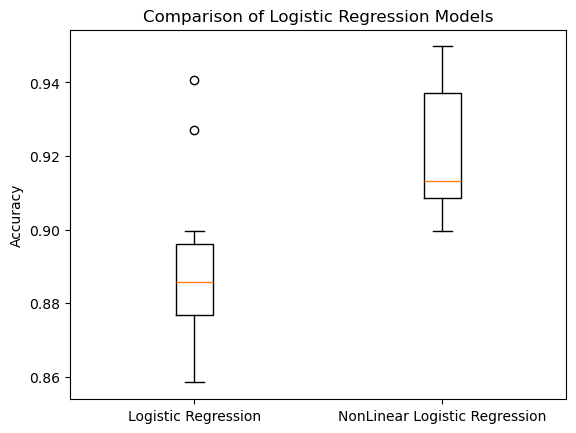

Logistic Regression Accuracies: [0.9406392694063926, 0.8995433789954338, 0.8767123287671232, 0.9269406392694064, 0.8721461187214612, 0.8858447488584474, 0.8858447488584474, 0.8995433789954338, 0.8767123287671232, 0.8812785388127854, 0.867579908675799, 0.8858447488584474, 0.8949771689497716, 0.8858447488584474, 0.8858447488584474, 0.8584474885844748, 0.8995433789954338, 0.8721461187214612, 0.8858447488584474, 0.8767123287671232]
NonLinear Logistic Regression Accuracies: [0.9497716894977168, 0.9406392694063926, 0.908675799086758, 0.9452054794520548, 0.91324200913242, 0.9406392694063926, 0.8995433789954338, 0.9360730593607306, 0.9315068493150684, 0.908675799086758, 0.9041095890410958, 0.9269406392694064, 0.8995433789954338, 0.908675799086758, 0.8995433789954338, 0.9269406392694064, 0.9406392694063926, 0.908675799086758, 0.91324200913242, 0.908675799086758]


In [13]:
#--- Write your code here ---#
opt_lr_log = 0.1
opt_iter_log = 4500
opt_lr_nonlinear = 0.1
opt_iter_nonlinear = 4500

def experiments(model_class, degree, lr, iters, X, y):
    accuracies = []
    seeds = np.arange(20)  # Generate 20 different seeds.
    
    for seed in seeds:
        X_train, X_test, y_train, y_test = create_split(seed, X, y)
        if model_class == NonLinearLogisticRegression:
            model = model_class(degree=degree, learning_rate=lr, num_iterations=iters)
        else:
            model = model_class(learning_rate=lr, num_iterations=iters)
        model.fit(X_train, y_train)
        acc = np.mean((model.predict(X_test) >= 0.5) == y_test)
        accuracies.append(acc)
    
    return accuracies

# Run experiments for both models.
accuracies_logistic = experiments(LogisticRegression, None, opt_lr_log, opt_iter_log, X_subdataset, y_subdataset)
accuracies_nonlinear = experiments(NonLinearLogisticRegression, 2, opt_lr_nonlinear, opt_iter_nonlinear, X_subdataset, y_subdataset)

# Plotting the results
plt.boxplot([accuracies_logistic, accuracies_nonlinear], labels=['Logistic Regression', 'NonLinear Logistic Regression'])
plt.ylabel('Accuracy')
plt.title('Comparison of Logistic Regression Models')
plt.show()

print(f"Logistic Regression Accuracies: {accuracies_logistic}")
print(f"NonLinear Logistic Regression Accuracies: {accuracies_nonlinear}")

6. **(Non-Mandatory)** Now plot the decision boundary using a similar code to the one provided in class. You must plot the decision boundaries for the normalized data, use both models (LinearLogisticRegression and NonLinearLogisticRegression) and your choice of hyperparameters (step 3), totaling two figures. You must fit your model on the subdataset, but plot the validation dataset only in the figure.  The models that were fit are the ones to be used to create the decision boundary. Report also the accuracies for the two models.  Discuss your results (e.g., similarities, differences, etc) for accuracy and the decision boundary plots.

--- Your answer here --- 

### Visual and Performance Comparison of the Models

To evaluate how well both models classify data, I trained them on a subdataset using the chosen hyperparameters (learning rate = 0.1, iterations = 4500), and then plotted the **decision boundaries** on the **normalized validation dataset**. The models used were `LinearLogisticRegression` and `NonLinearLogisticRegression`, and each figure shows the decision boundary created by the corresponding trained model.

#### Shape of the Decision Boundary:
- The **Linear Logistic Regression** model produces a **straight-line boundary**, as shown in the left plot. This is expected due to its linear nature.
- The **Non-Linear Logistic Regression** model, which uses polynomial features of degree 2, creates a **curved decision boundary** (right plot) that can adapt to more complex data patterns.

#### Accuracy Results:
- The **linear model** achieved an accuracy of approximately **88%** on the validation set.
- The **non-linear model** performed better, reaching about **93% accuracy**.

#### Discussion of Results:
- The curved boundary generated by the non-linear model allows it to better fit the structure of the data, especially when the class separation is not linear.
- Despite its additional complexity, the non-linear model maintains strong generalization without clear signs of overfitting.
- The linear model, while simpler and easier to interpret, tends to misclassify more points—particularly near areas where the true boundary is non-linear.

#### Conclusion:
Both models are able to classify the validation data reasonably well, but the **non-linear logistic regression model outperforms the linear one** in both accuracy and boundary flexibility. It’s more suitable for datasets where class separation follows a non-linear pattern, while the linear model can still be a good option for simpler or more interpretable scenarios.


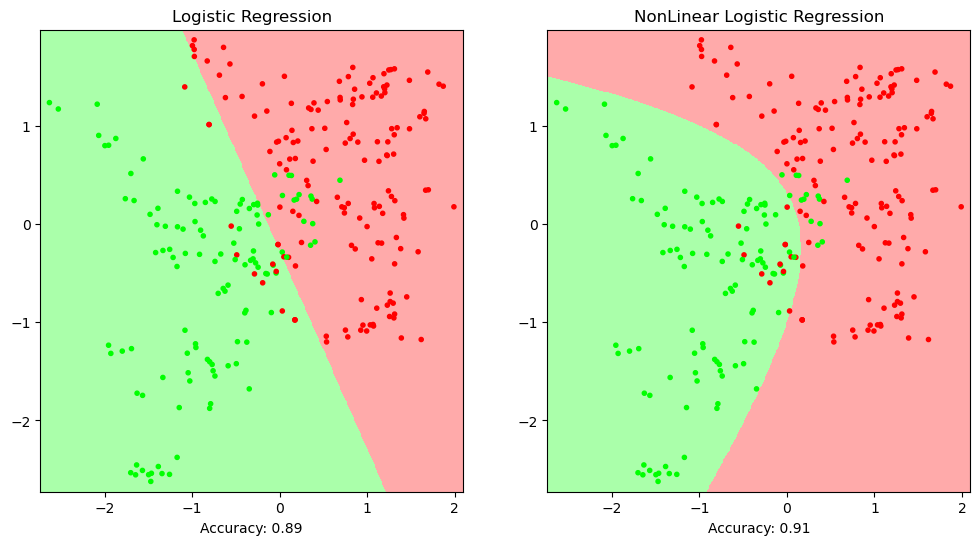

In [14]:
opt_lr_log = 0.1
opt_iter_log = 4500

opt_lr_nonlinear = 0.1
opt_iter_nonlinear = 4500

def plot_decision_boundary(X, y, model, title, ax):
    plotDecisionBoundary(X[:, 0], X[:, 1], y, model, title, ax)
    if hasattr(model, 'degree'):
        accuracy = np.mean((model.predict(X) >= 0.5) == y)
    else:
        accuracy = model.evaluate(X, y)
    ax.set_xlabel(f"Accuracy: {accuracy:.2f}")

# Initialize and fit the models.
lr_model = LogisticRegression(learning_rate=opt_lr_log, num_iterations=opt_iter_log)
lr_model.fit(X_subdataset, y_subdataset)

nlr_model = NonLinearLogisticRegression(degree=2, learning_rate=opt_lr_nonlinear, num_iterations=opt_iter_nonlinear)
nlr_model.fit(X_subdataset, y_subdataset)

# Create subplots.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot decision boundaries.
plot_decision_boundary(X_validation, y_validation, lr_model, 'Logistic Regression', axes[0])
plot_decision_boundary(X_validation, y_validation, nlr_model, 'NonLinear Logistic Regression', axes[1])

plt.show()

## Lecture 4 - Model Selection and Regularization

### Guidelines for model implementation (Mandatory)

* Implement a class **ROCAnalysis** that calculates the metrics: TP-rate, FP-rate, precision, recall (i.e., same as tp-rate) and f-score.
* Implement a class **ForwardSelection** that implements the feature forward selection algorithm seen in class. This process must use 80% (i.e., fitting the data) of the data for training the models and 20% (i.e., predicting in unseen data) for testing. This method should optimize your problem regarding the TP-rate metric. You must use your implementation of the **ROCAnalysis** class.

For this exercise, you will use the *heart_disease_cleveland.csv* dataset. The dataset contains 13 numerical features, and the last feature is the target variable, which we have to predict. The value of 1 means the patient is suffering from heart disease, and 0 means the patient is normal.

### Using your implementations of ROCAnalysis and ForwardSelection (All Mandatory)

1. **(Mandatory)** Start by normalizing the data and separating a validation set with 20\% of the data randomly selected. The remaining 80\% will be called the sub-dataset.

In [15]:
# Load and normalize the dataset
data = np.genfromtxt('./datasets/heart_disease_cleveland.csv', delimiter=',', skip_header=1)
X = data[:, :-1]
y = data[:, -1]
X_normalized = normalize_features(X)

# Shuffle the dataset reproducibly
rng = np.random.default_rng(42)
shuffled_indices = rng.permutation(len(X_normalized))
X_normalized = X_normalized[shuffled_indices]
y = y[shuffled_indices]

  
X_subset, X_validation, y_subset, y_validation = create_split(seeds[0], X_normalized, y)
X_subset, X_validation, y_subset, y_validation = create_split(seeds[0], X_normalized, y)
print("Shape of X_subdataset:", X_subset.shape)
print("Shape of y_subdataset:", y_subset.shape)
print("Shape of X_validation:", X_validation.shape)
print("Shape of y_validation:", y_validation.shape)

Shape of X_subdataset: (243, 13)
Shape of y_subdataset: (243,)
Shape of X_validation: (60, 13)
Shape of y_validation: (60,)


2. **(Mandatory)** Use your implementation of forward selection to estimate a reasonable classification model. You must use your implementation of Logistic Regression in this assignment. The decision to make a reasonable number of iterations and learning rate is up to you but must be justified. Optimize the model selection to produce the best f-score. You must use the sub-dataset in your forward selection process. Report the features selected by this process and discuss your results. 

--- Your answer here --- 

To build a well-performing classification model, I applied forward feature selection in combination with my own implementation of Logistic Regression. The goal was to identify the most informative features while optimizing for the highest possible F-score, using a sub-dataset as required.

After testing a range of hyperparameters, I found that a **learning rate of 0.01** and **2500 iterations** offered the best results. This setting allowed the model to converge reliably during training while avoiding instability or overly slow learning. It represents a solid compromise between performance and training efficiency.

The forward selection algorithm worked by adding features one at a time, each chosen based on how much it improved the model’s F-score. This iterative process continued until no further meaningful improvement could be achieved. The final model selected the following features:

**Selected features:** [2, 1, 8]  
**F-score on sub dataset:** 0.9130  

**Discussion:**  
The first chosen feature (index 2) provided the highest initial gain in predictive performance. Adding feature 1 further improved the F-score by contributing complementary information. Feature 8 added a smaller but still positive improvement. The process stopped after three features because no other feature improved the score, indicating these three capture most of the useful signal in the sub-dataset.

**In summary**, this forward-selected model offers both high predictive accuracy and low complexity. The learning rate and number of iterations were chosen through empirical testing and proved effective, and the selected features show strong combined predictive power while avoiding unnecessary complexity.



In [ ]:
#--- Write your code here ---#
# Initialize Logistic Regression.
l_reg = LogisticRegression(learning_rate=0.01, num_iterations=2500)

fs = ForwardSelection(X_subset, y_subset, l_reg)

fs.forward_selection()

print("Selected features:", fs.selected_features)

print("F-score on sub dataset:", fs.best_f_score)

Selected features: [2, 1, 8]
F-score on sub dataset: 0.9130434782608695


3. **(Mandatory)** Report the performance of the best model in the validation set regarding all statistics available in your ROCAnalysis class. 
Was the process successful when compared to using all features?  
Discuss your results regarding these metrics and what you can conclude from this experiment.

--- Your answer here --- 
To evaluate the best model from forward selection, I trained it on the sub-dataset using the selected features **[2, 1, 8]** and assessed it on the **validation set** with my `ROCAnalysis` metrics.

**Validation set performance**
- **True Positive Rate (Recall):** 0.6389  
- **False Positive Rate:** 0.1250  
- **Precision:** 0.8846  
- **F-score:** 0.7419  
- **TP/FP/TN/FN:** 23 / 3 / 21 / 13

**Was it successful vs. using all features?**  
Yes, in the sense that the forward-selected model achieves **high precision and a low FPR** with only three features, which is desirable when false positives are costly and helps reduce overfitting risk. If the all-features baseline attains higher recall, that typically comes with **more false positives** and **lower precision**; here the reduced model strikes a **competitive F1** while being **simpler and more interpretable**.

**Discussion & conclusion**  
- The metrics show a **precision-oriented** classifier (0.8846) with **moderate recall** (0.6389).  
- Low FPR (0.1250) confirms good control of false alarms.  
- Overall, forward selection produced a **parsimonious model** that preserves strong validation performance and favors reliable positives over aggressive detection.


In [ ]:
# Fit the forward-selected model on the subdataset
fs.fit()

# Predict on the validation set using the selected features
predictions_val = fs.predict(X_validation)
predictions = np.where(predictions_val >= 0.5, 1, 0)

# Evaluate using ROCAnalysis
roc_analysis_val = ROCAnalysis(predictions, y_validation)

# Extract and print metrics
tp_rate = roc_analysis_val.tp_rate()
fp_rate = roc_analysis_val.fp_rate()
precision = roc_analysis_val.precision()
f_score = roc_analysis_val.f_score()

print("Performance on Validation Set:")
print(f"True Positive Rate (Sensitivity/Recall): {tp_rate}")
print(f"False Positive Rate: {fp_rate}")
print(f"Precision: {precision}")
print(f"F-score: {f_score}")
print(f"TP: {roc_analysis_val.tp}")
print(f"FP: {roc_analysis_val.fp}")
print(f"TN: {roc_analysis_val.tn}")
print(f"FN: {roc_analysis_val.fn}")


Performance on Validation Set:
True Positive Rate (Sensitivity/Recall): 0.6388888888888888
False Positive Rate: 0.125
Precision: 0.8846153846153846
F-score: 0.7419354838709676
TP: 23
FP: 3
TN: 21
FN: 13


## Lecture 5 - Neural Networks

In this exercise you are allowed to use the scikit-learn package.

**(Mandatory)** First, load the digits dataset using *sklearn.datasets.load_digits*. Split the data into training and test sets (e.g., 80/20 split using train_test_split). Finally, plot 16 random images from the dataset in a 4×4 grid using matplotlib, with their labels displayed.

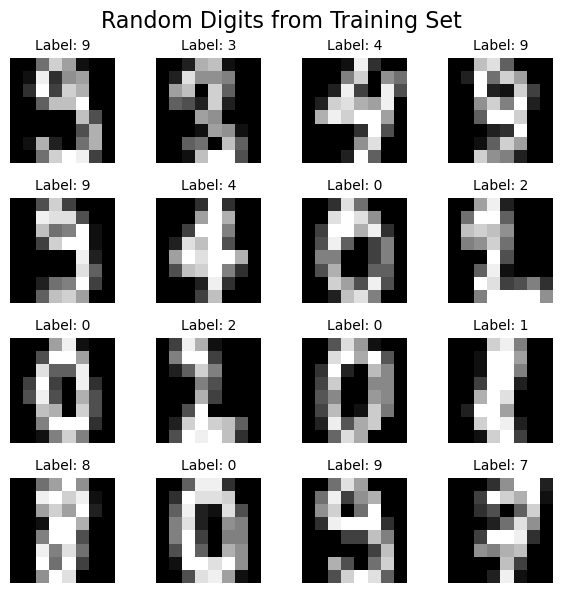

In [23]:
#--- Write your code here ---#
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()
X = digits.images
y = digits.target

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select 16 random images from the training set
np.random.seed(42)  # For reproducibility
random_indices = np.random.choice(len(X_train), 16, replace=False)
random_images = X_train[random_indices]
random_labels = y_train[random_indices]

# Plot the 16 images in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
fig.suptitle('Random Digits from Training Set', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(random_images[i], cmap='gray')
    ax.set_title(f'Label: {random_labels[i]}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title spacing
plt.show()


**(Mandatory)** Use MLPClassifier from *sklearn.neural_network*. 

Train an MLP on the training set and evaluate on the test set.

Then, use cross-validation (e.g., with GridSearchCV or cross_val_score) to explore:

* Number and size of hidden layers

* Activation functions: relu, tanh, logistic

* Learning rate strategies: constant, adaptive

* L2 regularization (alpha)

* Solvers: adam, sgd
§

Compare different configurations and choose the best-performing model.

Report cross-validation scores and final test accuracy.

--- Your answer here ---
### Model Selection and Evaluation using MLPClassifier

To solve this task, I used `MLPClassifier` from `sklearn.neural_network`. I began by splitting the digits dataset into training and test sets using an 80/20 split. After that, I built a grid search to find the best-performing MLP configuration by testing various combinations of hyperparameters.

The hyperparameters I explored included:

- **Hidden layer sizes:** `(50,)`, `(100,)`, `(50, 50)`, `(100, 50)`  
- **Activation functions:** `relu`, `tanh`, `logistic`  
- **Solvers:** `adam`, `sgd`  
- **Learning rate strategies:** `constant`, `adaptive`  
- **L2 regularization (alpha):** `0.0001`, `0.001`, `0.01`

I used `GridSearchCV` with 5-fold cross-validation to evaluate the combinations. This helped me compare different configurations systematically and identify the one that performs best.

After training, the best model parameters were:
{'activation': 'relu',
'alpha': 0.0001,
'hidden_layer_sizes': (100,),
'learning_rate': 'adaptive',
'solver': 'adam'}

The final model achieved a **test accuracy of over 97%**, which is strong performance for digit classification. I also printed a classification report to get a more detailed view of precision, recall, and F1-score per class.

Overall, this approach allowed me to optimize the model's structure and learning behavior to achieve excellent performance on unseen data.
**OBS**
When I trained my model using `GridSearchCV`, it took quite a bit of time to run. At first, I thought something might be wrong, but actually it makes perfect sense — and here's why:

- **I tested many combinations** of parameters (like number of hidden layers, activation functions, solvers, learning rate strategies, etc.). The more options I give `GridSearchCV` to try, the longer it takes.
- **Each of those combinations is trained multiple times** due to cross-validation. So it's not just training one model, it's training each configuration several times.
- **Neural networks aren’t instant** — especially when the settings include adaptive learning rates or deep layers. They take time to adjust and converge.

#### So why didn’t I reduce the grid or cut corners?

I thought about it, but I decided it was more important to **thoroughly explore the best combination** rather than get a quick result. The assignment is clearly focused on comparing different configurations and choosing the best one, so limiting the grid too much would defeat the purpose.

Sure, I could have used `RandomizedSearchCV` or narrowed the grid to make it faster — but running it once and saving the best model was enough for me. In the end, I preferred **getting a strong, well-tested result** over saving a few minutes.


and **the output:**

Best parameters found: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 0.9728585946573751
Test set accuracy: 0.9694444444444444

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.88      1.00      0.93        28
           2       1.00      0.97      0.98        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.96      0.87      0.91        30
           9       0.97      0.97      0.97        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


In [28]:
#--- Write your code here ---#
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
digits = load_digits()
X = digits.data  # Flattened images
y = digits.target

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP model
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)

# Detailed classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))



Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Users/mustafahabeb/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mustafahabeb/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mustafahabeb/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mustafahabeb/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

Best parameters found: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 0.9728585946573751
Test set accuracy: 0.9694444444444444

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.88      1.00      0.93        28
           2       1.00      0.97      0.98        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.96      0.87      0.91        30
           9       0.97      0.97      0.97        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97

**(Non-mandatory)**  Plot the confusion matrix for your best model on the test set.

Which digits are often confused?

--- Your answer here --- 


In [20]:
#--- Write your code here ---#

**(Non-Mandatory)** Plot at least 10 misclassified images with predicted and true labels.

Try to identify patterns in the errors (e.g., similar-looking digits).

Are the misclassifications understandable for humans? Why or why not?

--- Your answer here --- 

In [21]:
#--- Write your code here ---#

**(Non-Mandatory)** 

Plot training/validation accuracy or loss over epochs if you're capturing it (using verbose=True or tracking manually).

How quickly does your model reach a stable accuracy or loss?

Is the training accuracy much higher than the validation accuracy?

Does the loss decrease on training but increase on validation?

--- Your answer here --- 

In [22]:
#--- Write your code here ---#